In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.metrics import r2_score


In [2]:
real_estate = pd.read_csv('../00-data/Real estate.csv')

real_estate

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
real_estate.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [4]:
real_estate.rename(columns={
  'X1 transaction date': 'transaction_date',
  'X2 house age': 'house_age',
  'X3 distance to the nearest MRT station': 'distance_to_nearest_MRT_station',
  'X4 number of convenience stores': 'number_of_convenience_stores',
  'X5 latitude': 'lat',
  'X6 longitude': 'long',
  'Y house price of unit area': 'price_unit_area'
}, inplace=True)

In [5]:
real_estate

,No,transaction_date,house_age,distance_to_nearest_MRT_station,number_of_convenience_stores,lat,long,price_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [6]:
real_estate.columns

Index(['No', 'transaction_date', 'house_age',
       'distance_to_nearest_MRT_station', 'number_of_convenience_stores',
       'lat', 'long', 'price_unit_area'],
      dtype='object')

trovo i nan

In [7]:
real_estate.isnull().sum()

No                                 0
transaction_date                   0
house_age                          0
distance_to_nearest_MRT_station    0
number_of_convenience_stores       0
lat                                0
long                               0
price_unit_area                    0
dtype: int64

In [8]:
real_estate.columns

Index(['No', 'transaction_date', 'house_age',
       'distance_to_nearest_MRT_station', 'number_of_convenience_stores',
       'lat', 'long', 'price_unit_area'],
      dtype='object')

suddivido test e train set

In [9]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   No                               414 non-null    int64  
 1   transaction_date                 414 non-null    float64
 2   house_age                        414 non-null    float64
 3   distance_to_nearest_MRT_station  414 non-null    float64
 4   number_of_convenience_stores     414 non-null    int64  
 5   lat                              414 non-null    float64
 6   long                             414 non-null    float64
 7   price_unit_area                  414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [10]:
X = real_estate.drop(['No', 'price_unit_area'], axis=1)
y = real_estate['price_unit_area'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #  stratify=y

print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

X_train: (289, 6), X_test: (125, 6), y_train: (289,), y_test: (125,)


tento la gridSearch

In [ ]:
param_grid = {
    'poly__degree': np.arange(1, 4),
    'regressor__fit_intercept': [True, False],
    'regressor': [Ridge(), Lasso()],
    'regressor__alpha': [0.0001,0.001,0.01,0.1,1,10]
}

In [12]:
def search_polynomial_regression(numerical_features, param_grid, params, cv=5, n_jobs=-1, verbose=2, scoring=None, search_strategy='grid'):
  numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

  preprocessor = ColumnTransformer(
      transformers=[('num', numeric_transformer, numerical_features)],
      remainder='passthrough'
  )

  pipeline_poly_reg = Pipeline([
      ('preprocessor', preprocessor),
      ('poly', PolynomialFeatures(include_bias=False)),
      ('regressor', LinearRegression())
  ])
  result = None
  if (search_strategy == 'grid'):
      result = GridSearchCV(estimator=pipeline_poly_reg, param_grid=param_grid, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring)
  else:
    result = RandomizedSearchCV(estimator=pipeline_poly_reg, param_distributions=param_grid, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring)
  return result.fit(params[0], params[1])

In [13]:
numerical_features = ['transaction_date', 'house_age', 'distance_to_nearest_MRT_station', 'number_of_convenience_stores', 'lat', 'long']


In [14]:
%%time
pr_grid = search_polynomial_regression(numerical_features=numerical_features, params=[X_train, y_train], param_grid=param_grid)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 688 ms
Wall time: 4.71 s


In [15]:
%%time
pr_rnd = search_polynomial_regression(numerical_features=numerical_features, params=[X_train, y_train], param_grid=param_grid, search_strategy='random')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 156 ms
Wall time: 248 ms


In [16]:
pr_grid.best_params_

{'poly__degree': np.int64(2),
 'regressor': Lasso(),
 'regressor__alpha': 0.1,
 'regressor__fit_intercept': True}

In [17]:
pr_rnd.best_params_

{'regressor__fit_intercept': True,
 'regressor__alpha': 0.0001,
 'regressor': Lasso(),
 'poly__degree': np.int64(2)}

In [18]:
pr_grid.best_score_

np.float64(0.6738611844401731)

In [19]:
pr_rnd.best_score_

np.float64(0.6474754046204423)

<Axes: >

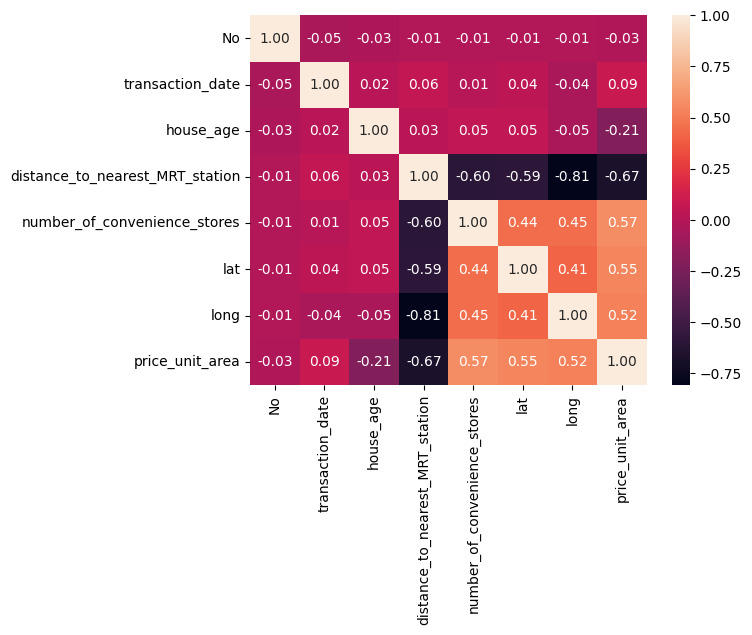

In [20]:
sns.heatmap(real_estate.corr(), annot=True, fmt=".2f")

In [21]:
real_estate.min()

No                                    1.00000
transaction_date                   2012.66700
house_age                             0.00000
distance_to_nearest_MRT_station      23.38284
number_of_convenience_stores          0.00000
lat                                  24.93207
long                                121.47353
price_unit_area                       7.60000
dtype: float64

In [22]:
real_estate.max()

No                                  414.00000
transaction_date                   2013.58300
house_age                            43.80000
distance_to_nearest_MRT_station    6488.02100
number_of_convenience_stores         10.00000
lat                                  25.01459
long                                121.56627
price_unit_area                     117.50000
dtype: float64

dalla heatmap è possibile evidenziare un lievissimo processo inflattivo la cui lievità è perfettamente normale dato che il range è di un anno, un lieve calo dei prezzi per case vecchie e un maggiore prezzo per le zone più a nord-ovest che probabilmente risultano più attrezzate di metro e di negozi, quindi potrei provare a ripetere il processo eliminando la data

In [23]:
X_no_data = real_estate.drop(['No', 'price_unit_area', 'transaction_date'], axis=1)
y_no_data = real_estate['price_unit_area'].values

In [24]:
X_no_data_train, X_no_data_test, y_no_data_train, y_no_data_test = train_test_split(X_no_data, y_no_data, test_size=0.3, random_state=42) #  stratify=y

print(f'X_train: {X_no_data_train.shape}, X_test: {X_no_data_test.shape}, y_train: {y_no_data_train.shape}, y_test: {y_no_data_test.shape}')

X_train: (289, 5), X_test: (125, 5), y_train: (289,), y_test: (125,)


In [25]:
numerical_features_no_data = ['house_age', 'distance_to_nearest_MRT_station', 'number_of_convenience_stores', 'lat', 'long']


In [26]:
%%time
pr_grid_no_data = search_polynomial_regression(numerical_features=numerical_features_no_data, params=[X_no_data_train, y_no_data_train], param_grid=param_grid)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 438 ms
Wall time: 1.19 s


In [27]:
pr_grid.best_score_

np.float64(0.6738611844401731)

In [28]:
pr_grid_no_data.best_score_

np.float64(0.6549466707935135)

In [29]:
%%time
pr_rnd_no_data = search_polynomial_regression(numerical_features=numerical_features_no_data, params=[X_no_data_train, y_no_data_train], param_grid=param_grid, search_strategy='random')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 125 ms
Wall time: 219 ms


In [30]:
pr_rnd_no_data.best_score_

np.float64(0.6549466707935135)

In [31]:
pr_rnd.best_score_

np.float64(0.6474754046204423)

il comportamento migliore lo ha la grid senza la colonna transaction_date, provo tutti e 4 i modelli per completezza

In [32]:
pr_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['transaction_date',
                                                                          'house_age',
                                                                          'distance_to_nearest_MRT_station',
                                                                          'number_of_convenience_stores',
                                                                          'lat',
                                                                          'long'])])),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('regressor', LinearRegression())]),
             n_jobs=-1,
             param_grid={'poly__degree': array([1, 2, 3]),
                         'regressor': [Ridge(), Lasso()],
                         'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'regressor__fit_intercept': [True, False]},
             verbose=2)

In [33]:
def calculate_score (model, X_test, y_test):
  y_pred = model.predict(X_test)
  return r2_score(y_test, y_pred)

In [36]:
print(f'griglia con data: test: {calculate_score(pr_grid.best_estimator_, X_test, y_test)}, train: {pr_grid.best_score_}')
print(f'griglia senza data: {calculate_score(pr_grid_no_data.best_estimator_, X_no_data_test, y_no_data_test)}, train: {pr_grid_no_data.best_score_}')
print(f'random con data: {calculate_score(pr_rnd.best_estimator_,X_test, y_test)}, train: {pr_rnd.best_score_}')
print(f'random senza data: {calculate_score(pr_rnd_no_data.best_estimator_,X_no_data_test, y_no_data_test)}, train: {pr_rnd_no_data.best_score_}')

griglia con data: test: 0.6640491312965011, train: 0.6738611844401731
griglia senza data: 0.6554405178188961, train: 0.6549466707935135
random con data: 0.6486817556797924, train: 0.6474754046204423
random senza data: 0.6554405178188961, train: 0.6549466707935135


dati i risultati sembra esserci una situazione nettamente migliore nella griglia tenendo conto della data, mentre non tenendo conto della data di acquisto avremo le stesse performance in termini di accuratezza, ma prestazioni nettamente migliori in termini di tempi per ricerca random che senza tener conto della data di acquisto sembra portare alle stesse stime della griglia.

Se è necessario avere un accuratezza migliore possibile è conveniente utilizzare una gridsearch sul dataset tenendo conto della data, se abbiamo bisogno di un modello addestrato in modo efficiente è conveniente usare la randomsearch non tenendo conto della data di acquisto